 ## Introduction
This notebook was created for exploration, analysis and prediction making of the Auto MPG data set from UCI Machine Learning Library. The data set can be accessed separately from the UCI Machine Learning Repository page, [here](http://archive.ics.uci.edu/ml/datasets/Auto+MPG). It's aim is primarily to build a regression model with the use of *scikit-learn* library to predict the Miles Per Gallon (MPG) using the factors provided in the data set.

## Description
The following description can be found on the UCI Repository page for the data set.

-   This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original data set is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)


## Relevant Papers

In his paper "Combining Instance-Based and Model-Based Learning", (Quinlan,R., 1993), which can be found [here](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.34.6358&rep=rep1&type=pdf), Quinlan tries to predict the city cycle consumption in miles per galon, using three methods: Multivariate Linear Regression, Model trees and Neural Networks. With multivariate linear regression, he calculates the relative error magnitude on unseen cases for the data set, which is **19.4%**. As explained in his paper, relative error is defined as the variance of the residuals on unseen cases, devided by the variance of the class values themselves. This statistic measures the squared error.

## Goal 

We will create a multivariate linear regression model to predict the MPG consumption, while minimize the relative error, presented above. For our model, we will use the original full data set (**auto-mpg_data-original.csv**).

## Libraries
In general the packages/libraries that we will use are listed below:
- pandas
- matplotlib
- seaborn
- scikit-learn

This notebook will be split into two major sections, majorly:

- Exploration, visualization and cleaning the data set using pandas  and seaborn packages.
- Building evaluating and tuning different regression models using scikit-learn package.


## Install libraries/packages

In [2]:
!pip install pandas
!pip install matplotlib
!pip install plotly
!pip install seaborn
!pip install numpy
!pip install scikit-learn

## Import libraries/packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Import the original dataset

In [2]:
# Read the data from the auto-mpg_data-original.csv file.
ds=pd.read_csv("auto-mpg_data-original.csv")

# Part 1: Explore, Visualize and Clean the data.

## Inspect the data

In [3]:
# Display the shape of the data.
print("The data frame has {} rows and {} columns.".format(ds.shape[0],ds.shape[1]))

The data frame has 406 rows and 9 columns.


In [4]:
# Examine the first 5 rows of the data set.
ds.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [5]:
# Statistics for the data set.
ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.50,23.0,29.000,46.6
cylinders,406.0,5.475369,1.712160,3.0,4.00,4.0,8.000,8.0
displacement,406.0,194.779557,104.922458,68.0,105.00,151.0,302.000,455.0
horsepower,400.0,105.082500,38.768779,46.0,75.75,95.0,130.000,230.0
weight,406.0,2979.413793,847.004328,1613.0,2226.50,2822.5,3618.250,5140.0
acceleration,406.0,15.519704,2.803359,8.0,13.70,15.5,17.175,24.8
model year,406.0,75.921182,3.748737,70.0,73.00,76.0,79.000,82.0
origin,406.0,1.568966,0.797479,1.0,1.00,1.0,2.000,3.0


In [6]:
# Check for duplicate rows in the data set.
ds.duplicated().any()

False

In [7]:
# Examine the data types and the number of non-null items.
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       406 non-null float64
displacement    406 non-null float64
horsepower      400 non-null float64
weight          406 non-null float64
acceleration    406 non-null float64
model year      406 non-null float64
origin          406 non-null float64
car name        406 non-null object
dtypes: float64(8), object(1)
memory usage: 28.6+ KB


In [8]:
# Count how many null values are there for each attribute.
ds.isnull().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

It seems that there are 6 missing values from the **"horsepower"** attribute and 8 from the **"mpg"** attribute. Let's see what we can do with both of them.

The rows with a null or missing value at the **"mpg"** attribute can be seen below:

In [9]:
# Rows with null or missing value at the "mpg" attribute.
ds[ds['mpg'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
10,NaN,4.0,133.0,115.0,3090.0,17.5,70.0,2.0,citroen ds-21 pallas
11,NaN,8.0,350.0,165.0,4142.0,11.5,70.0,1.0,chevrolet chevelle concours (sw)
12,NaN,8.0,351.0,153.0,4034.0,11.0,70.0,1.0,ford torino (sw)
13,NaN,8.0,383.0,175.0,4166.0,10.5,70.0,1.0,plymouth satellite (sw)
14,NaN,8.0,360.0,175.0,3850.0,11.0,70.0,1.0,amc rebel sst (sw)
17,NaN,8.0,302.0,140.0,3353.0,8.0,70.0,1.0,ford mustang boss 302
39,NaN,4.0,97.0,48.0,1978.0,20.0,71.0,2.0,volkswagen super beetle 117
367,NaN,4.0,121.0,110.0,2800.0,15.4,81.0,2.0,saab 900s


The above rows provide us no usefull information due to the fact that the class attribute value is missing. Because of this, we cannot use them as a training or test set for our model, so we will remove them from the dataset.  If we want, we can use them as a validation set, after the completion of the training and testing of our model. For now, we store them for a potential future use. These rows will be removed permanently from the data set later.

In [10]:
# Store rows with a missing value at "mpg" attribute as a validation set for future use.
validation_set=ds[ds['mpg'].isnull()].drop('mpg',axis=1)
validation_set

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
10,4.0,133.0,115.0,3090.0,17.5,70.0,2.0,citroen ds-21 pallas
11,8.0,350.0,165.0,4142.0,11.5,70.0,1.0,chevrolet chevelle concours (sw)
12,8.0,351.0,153.0,4034.0,11.0,70.0,1.0,ford torino (sw)
13,8.0,383.0,175.0,4166.0,10.5,70.0,1.0,plymouth satellite (sw)
14,8.0,360.0,175.0,3850.0,11.0,70.0,1.0,amc rebel sst (sw)
17,8.0,302.0,140.0,3353.0,8.0,70.0,1.0,ford mustang boss 302
39,4.0,97.0,48.0,1978.0,20.0,71.0,2.0,volkswagen super beetle 117
367,4.0,121.0,110.0,2800.0,15.4,81.0,2.0,saab 900s


In [11]:
# Rows with null or missing value at the "horsepower" attribute.
ds[ds['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
38,25.0,4.0,98.0,NaN,2046.0,19.0,71.0,1.0,ford pinto
133,21.0,6.0,200.0,NaN,2875.0,17.0,74.0,1.0,ford maverick
337,40.9,4.0,85.0,NaN,1835.0,17.3,80.0,2.0,renault lecar deluxe
343,23.6,4.0,140.0,NaN,2905.0,14.3,80.0,1.0,ford mustang cobra
361,34.5,4.0,100.0,NaN,2320.0,15.8,81.0,2.0,renault 18i
382,23.0,4.0,151.0,NaN,3035.0,20.5,82.0,1.0,amc concord dl


In order not to lose the information provided by the non-null attributes in the above rows, we will fill the missing values with the mean of the "horsepower" attribute.

In [12]:
# Fill the missing values of "horsepower" with the mean of "horsepower".
ds['horsepower']=ds['horsepower'].fillna(ds['horsepower'].mean())

In [13]:
# Check if there are more missing values at the "horsepower" attribute.
ds['horsepower'].isnull().any()

False

In [14]:
# Remove rows from the data set with a missing value at the "mpg" attribute.
new_ds=ds.dropna()

The data set we end up with, has no missing values at all.

In [15]:
# Information about the new "clean" data set.
new_ds.info()

# Display the shape of the data.
print("\nThe new data frame has {} rows and {} columns.".format(new_ds.shape[0],new_ds.shape[1]))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 405
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null float64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null float64
origin          398 non-null float64
car name        398 non-null object
dtypes: float64(8), object(1)
memory usage: 31.1+ KB

The new data frame has 398 rows and 9 columns.


In [16]:
# Statistics for the new data set.
new_ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.478631,38.199261,46.0,76.000,95.0,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


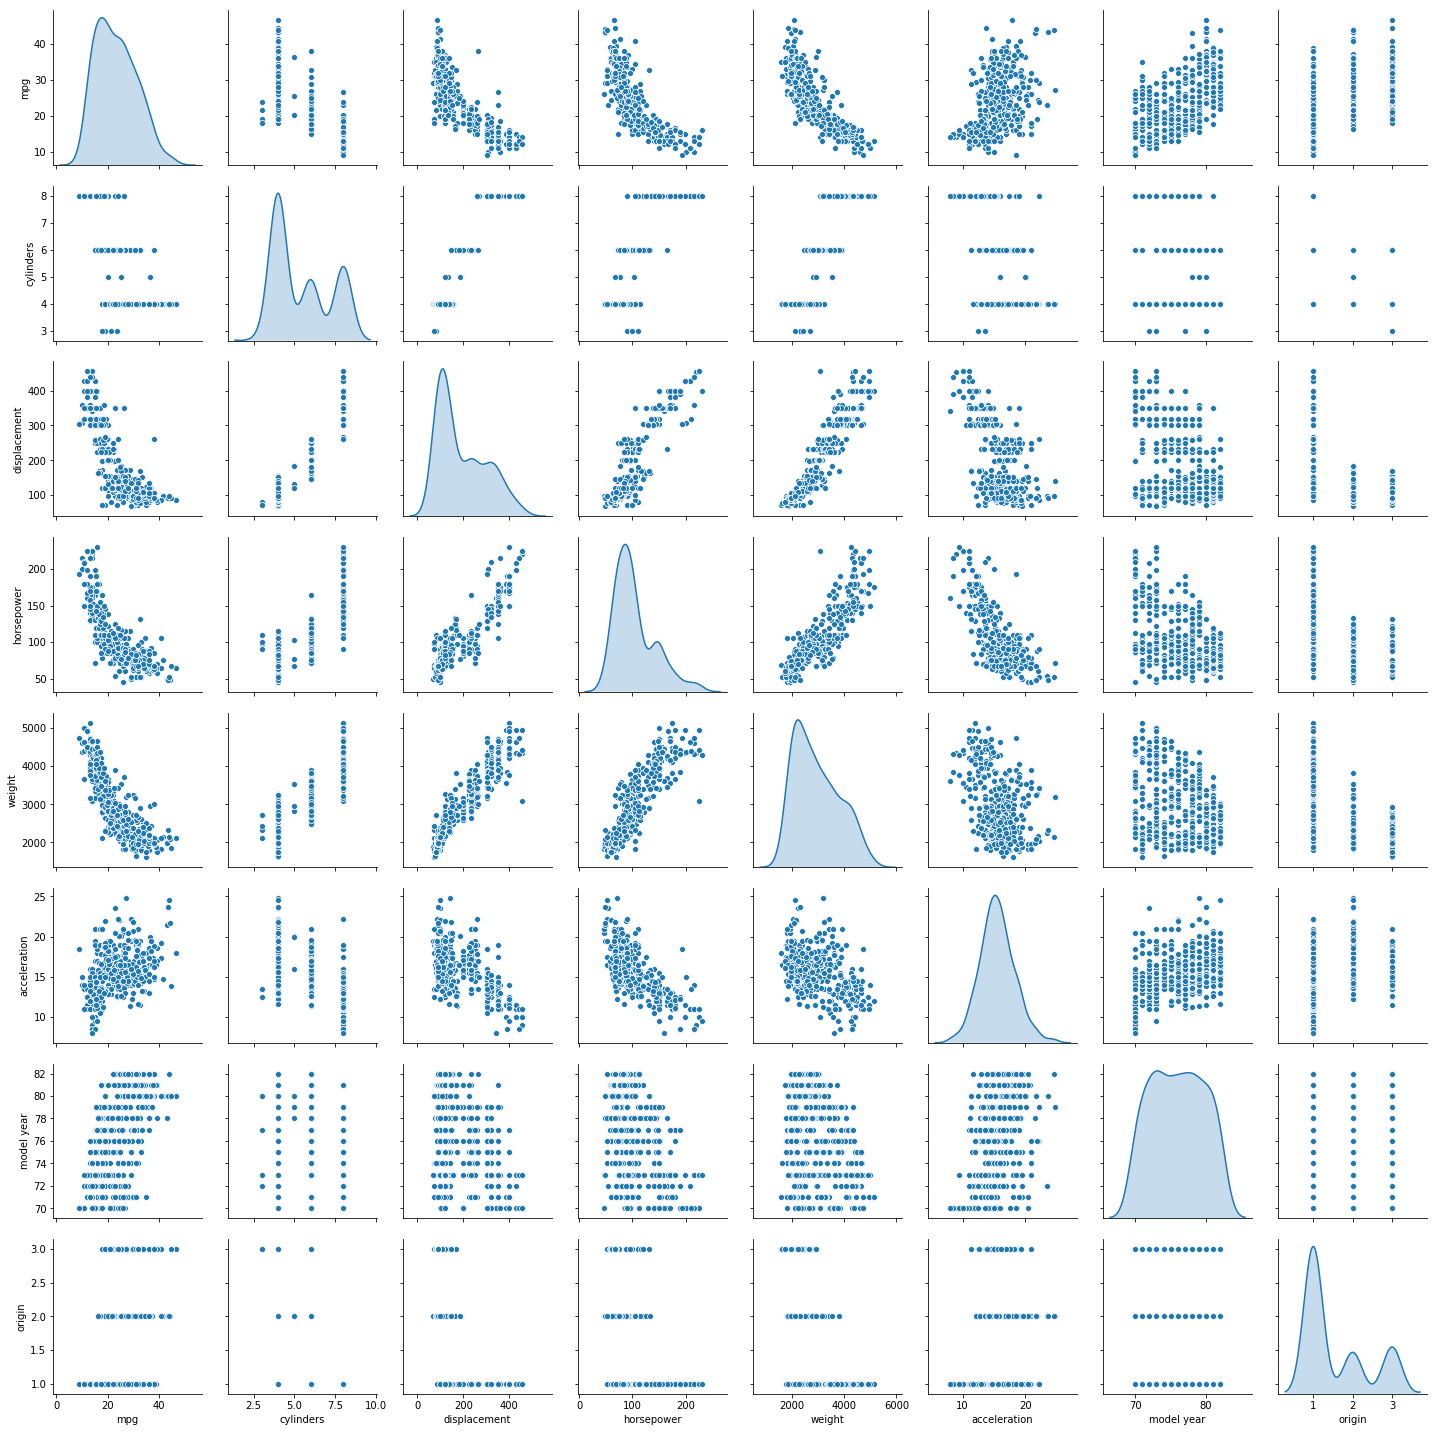

In [17]:
# Plotting a pairplot for the new data set.
sns.pairplot(data=new_ds, diag_kind='kde')

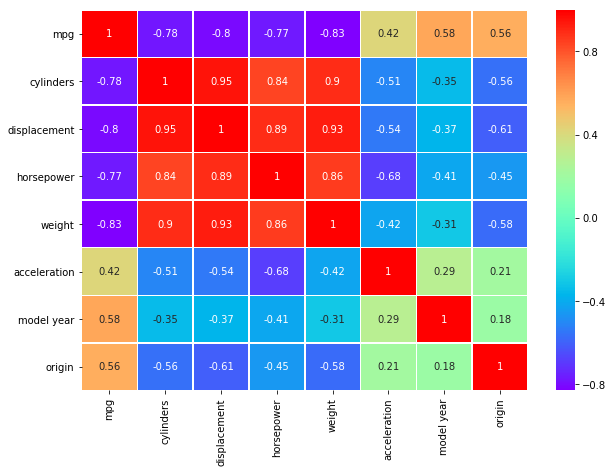

In [18]:
# Plotting a correlation heatmap for the new data set.
corr = new_ds.corr()
plt.figure(figsize=(10,7))
sns.heatmap(data=corr,annot=True,cmap='rainbow',linewidth=0.5)

# Part 2: Building the model

## Modeling

In [19]:
# Splitting the data set into training and test set.
X = new_ds.iloc[:,1:8].values
Y = new_ds.iloc[:,0].values

## Multivariate Regression

In [20]:
# Import modules for building a Linear Regression model.
from sklearn.model_selection import train_test_split, cross_validate, KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics

In [21]:
# Create the X_train,X_test,Y_train,Y_test sets. The test set is 25% of the whole data set.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [22]:
# Ordinary least squares Linear Regression.
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# Print the coefficients and the bias in the decision function.
m = regressor.coef_
b = regressor.intercept_
print('(mpg) = {0}(cylinders) + {1}(displacement) + {2}(horsepower) + {3}(weight) + {4}(acceleration) + {5}(model year) + {6}(origin) + {7}'.format(m[0],m[1],m[2],m[3],m[4],m[5],m[6], b))

(mpg) = -0.31159685611557386(cylinders) + 0.021027335147821947(displacement) + -0.02079523152427987(horsepower) + -0.006506780637230083(weight) + 0.2005893559348332(acceleration) + 0.7408279799188643(model year) + 1.6224837352077035(origin) + -19.485843925799344


In [24]:
# Predict the "mpg" values for the Y_test set.
Y_pred = regressor.predict(X_test)
print(Y_pred)

[12.9235681  23.96549013 11.69171595 21.09423867 17.37950413 29.92827482
 33.31535749 23.54528769 14.22706979 26.42082721 32.91133647 34.01059435
 21.42709469 26.81662599 16.16900576 30.24072493 28.62818081 28.75626687
 17.43670622 30.60598383 15.45282337 24.61947741 27.0326961  19.89175035
 29.16706982 28.2972     30.53930996 30.19009668 29.05814043 18.20388732
 20.6917911  31.1618861  21.46983961 32.22484443 23.79261995 25.64527406
 21.35267451 16.92479961 31.71581618  8.71277831  9.94806409 13.70741435
 25.93208787 29.86640322 31.36232989 22.35022523 23.03371046 13.49064908
 22.10513763 27.93821022 31.25734161 26.5398594  15.3766531  24.85353424
 14.84233771  8.33333741 19.43829431 26.16894094 29.91662905 14.60504818
 21.16193335 24.67787202 22.00774895 18.9883081  10.57409398 11.9147427
 10.1650533  19.60496711 23.90879853  9.93064766 34.92264575 10.53421581
 20.9987123  19.0157879  23.96847699 27.72148748 30.57185159 30.21136621
 28.35849528 15.70637178 12.35330573 27.78122239 31.

In [25]:
# The mean squared error (relative error).
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))

# Explained average absolute error (average error).
print("Average absolute error: %.2f" % mean_absolute_error(Y_test, Y_pred))

# Explained variance score: 1 is perfect prediction.
print('Variance score: %.2f' % regressor.score(X_test, Y_test))

Mean squared error: 11.65
Average absolute error: 2.71
Variance score: 0.81


In [26]:
# Predict "mpg" for validation set.

# V_pred=regressor.predict(validation_set.drop('car name',axis=1))
# V_pred

## K-Folds Cross Validation

In K-Folds Cross Validation we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data. We then average the model against each of the folds and then finalize our model. After that we test it against the test set.

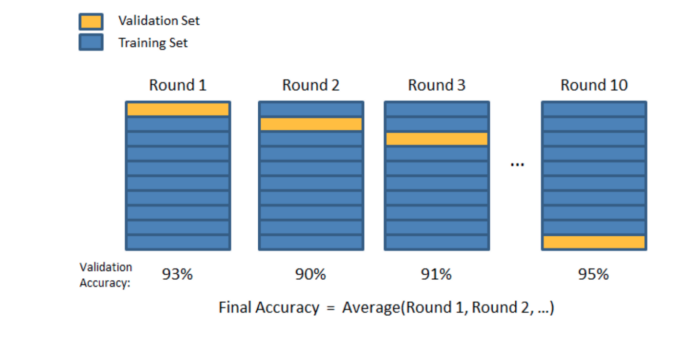

To repeat the methodology Quinlan used in his paper and to compare our results, we set *k* (number of subsets) to 10.

In [27]:
# Set k to 10 on the training set.
splits=10
kf = KFold(n_splits=splits)
kf.get_n_splits(X)
print(kf)

KFold(n_splits=10, random_state=None, shuffle=False)


In [28]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

In [29]:
# Perform 10-fold cross validation.
scores = cross_val_score(regressor, X_train, y_train, cv=10)
print('Cross-validated scores:', scores)

Cross-validated scores: [ 0.72795933  0.73414435  0.82447799  0.58509083  0.70103437  0.82107186
  0.80799473 -0.04625636  0.63214652 -0.04827866]


In [30]:
# Plotting the score per fold.

fig = go.Figure(data=go.Scatter(y=scores))
fig.update_layout(title='Score per fold',xaxis_title='N-th Fold',yaxis_title='Score')
fig.show()

In [31]:
# Make cross validated predictions
predictions = cross_val_predict(regressor, X_test, y_test, cv=10)

In [32]:
# Cross-Predicted Accuracy for the K-fold.
accuracy = metrics.r2_score(y_test, predictions)
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.16585413008886907


In [33]:
# The mean squared error (relative error) for the K-fold.
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, predictions))

# Explained average absolute error (average error) for the K-fold.
print("Average absolute error: %.2f" % metrics.mean_absolute_error(y_test, predictions))

Mean squared error: 28.65
Average absolute error: 4.07
